In [1]:
import pandas as pd

In [3]:
data =pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
min(data["Fare"])

0.0

In [6]:
max(data["Fare"])

512.3292

In [7]:
min(data["Age"])

0.42

In [8]:
max(data["Age"])

80.0

In [9]:
df=data[["Fare","Age"]]

In [10]:
df.head()


,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0


In [11]:
df.isnull().sum()

Fare      0
Age     177
dtype: int64

In [13]:
df.shape

(891, 2)

In [16]:
df=df.dropna()

In [17]:
df.isnull().sum()

Fare    0
Age     0
dtype: int64

### Min-Max scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler()     ####BY DEFAULT RANGE IS (0 to 1)

In [23]:
scaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
df_minmax=scaler.transform(df)

In [28]:
df_minmax

array([[0.01415106, 0.27117366],
       [0.13913574, 0.4722292 ],
       [0.01546857, 0.32143755],
       ...,
       [0.0585561 , 0.23347575],
       [0.0585561 , 0.32143755],
       [0.01512699, 0.39683338]])

In [30]:
df_minmax=pd.DataFrame(df_minmax,columns =['Fare','Age'])

In [31]:
df_minmax

,Fare,Age
0,0.014151,0.271174
1,0.139136,0.472229
2,0.015469,0.321438
3,0.103644,0.434531
4,0.015713,0.434531
...,...,...
709,0.056848,0.484795
710,0.025374,0.334004
711,0.058556,0.233476
712,0.058556,0.321438


In [32]:
df.describe()

,Fare,Age
count,714.000000,714.000000
mean,34.694514,29.699118
std,52.918930,14.526497
min,0.000000,0.420000
25%,8.050000,20.125000
50%,15.741700,28.000000
75%,33.375000,38.000000
max,512.329200,80.000000


In [33]:
df_minmax.describe()

,Fare,Age
count,714.000000,714.000000
mean,0.067719,0.367921
std,0.103291,0.182540
min,0.000000,0.000000
25%,0.015713,0.247612
50%,0.030726,0.346569
75%,0.065144,0.472229
max,1.000000,1.000000


In [34]:
import seaborn as sns

C:\Users\ANAND\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

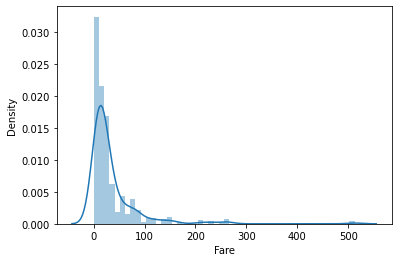

In [36]:
sns.distplot(df['Fare'])

C:\Users\ANAND\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

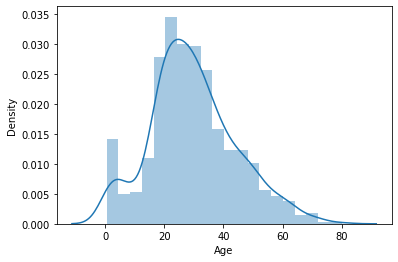

In [37]:
sns.distplot(df['Age'])

C:\Users\ANAND\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

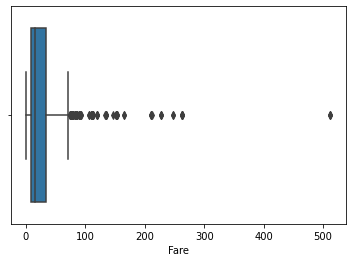

In [38]:
sns.boxplot(df['Fare'])

C:\Users\ANAND\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

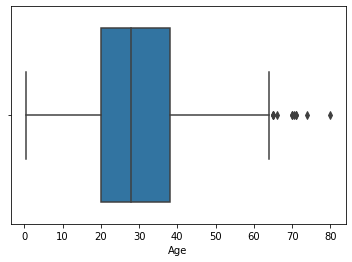

In [39]:
sns.boxplot(df["Age"])

C:\Users\ANAND\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

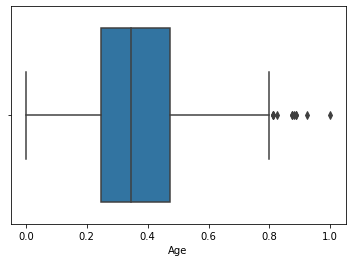

In [40]:
sns.boxplot(df_minmax['Age'])

C:\Users\ANAND\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

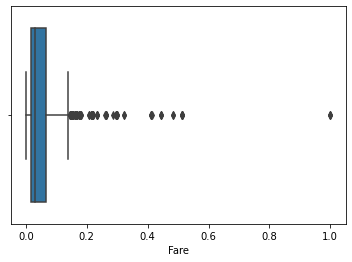

In [41]:
sns.boxplot(df_minmax["Fare"])

### Standard scaler

##### Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [42]:
from sklearn.preprocessing import StandardScaler 

In [50]:
sdc=StandardScaler()

In [52]:
 df_sdc=sdc.fit_transform(df)

In [53]:
df_sdc=pd.DataFrame(df_sdc,columns=["Fare","Age"])

In [55]:
df_sdc.head()

,Fare,Age
0,-0.518978,-0.530377
1,0.691897,0.571831
2,-0.506214,-0.254825
3,0.348049,0.365167
4,-0.503850,0.365167


In [56]:
df_sdc.describe()

,Fare,Age
count,7.140000e+02,7.140000e+02
mean,-5.022437e-17,2.174187e-16
std,1.000701e+00,1.000701e+00
min,-6.560759e-01,-2.016979e+00
25%,-5.038498e-01,-6.595416e-01
50%,-3.583992e-01,-1.170488e-01
75%,-2.495211e-02,5.718310e-01
max,9.032109e+00,3.465126e+00


In [57]:
df_sdc.mean()

Fare   -5.022437e-17
Age     2.174187e-16
dtype: float64

In [58]:
df_sdc.std()

Fare    1.000701
Age     1.000701
dtype: float64

<AxesSubplot:>

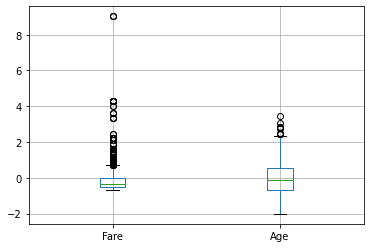

In [62]:
df_sdc.boxplot()

<AxesSubplot:>

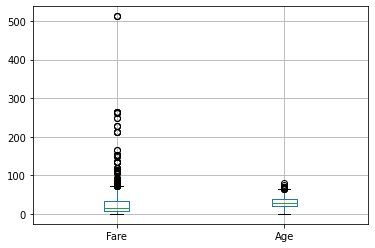

In [63]:
df.boxplot()

### ROBUST SCALER

##### Robust Scaler
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

In [64]:
from sklearn.preprocessing import RobustScaler 

In [70]:
rbs=RobustScaler()

In [71]:
rbs.fit(df)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [72]:
df_rbs=rbs.fit_transform(df)

In [73]:
df_rbs=pd.DataFrame(df_rbs,columns=['Fare','Age'])

In [74]:
df_rbs.describe()

,Fare,Age
count,714.000000,714.000000
mean,0.748384,0.095056
std,2.089592,0.812671
min,-0.621587,-1.542937
25%,-0.303720,-0.440559
50%,0.000000,0.000000
75%,0.696280,0.559441
max,19.608588,2.909091


<AxesSubplot:>

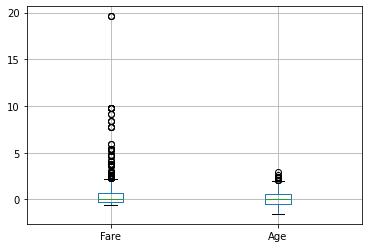

In [75]:
df_rbs.boxplot()